# HDS5210-2023 Final Project
Prioritizing the management of data quality concerns such as missing values and outliers is crucial, since they have the potential to distort the results of analysis. Comprehending intricate connections among many elements like age, cholesterol, and blood pressure becomes difficult without the use of modern
modeling approaches. As a result, the project's scope may be restricted, which will affect the ability to identify subtle patterns in the data. Furthermore, the absence of prognosis capabilities prevents the ability to predict future events or the advancement of diseases for individuals. However, it is essential to utilize descriptive statistics, exploratory visualization, and thorough analysis to derive significant insights from the information, even with these challenges.

The purpose of the project is:


*   Conduct in-depth exploratory analysis to understand the distributions, correlations, and patterns among heart disease risk factors within the dataset.
*   Explore correlations between different factors (e.g., age, sex, blood pressure, cholesterol) and heart disease to identify potential associations or relationships.

*   Generate descriptive statistics (mean, median, standard deviation, etc.) for various heart disease factors and compare them across different demographics (age, gender).
*   Create visualizations (histograms, box plots, etc.) to showcase trends and distributions of heart disease risk factors across different age groups or genders.
*   Compare and contrast the prevalence of heart disease risk factors between different groups (age brackets, genders) to identify potential disparities or patterns.

*   While not creating predictive models, we can analyze which factors seem to have a higher correlation or impact on heart disease without building a formal predictive model.

*   Focus on data preprocessing techniques like handling missing values, data normalization, or feature engineering to ensure the data's quality before analysis.



In [1]:
!pip install kaggle


# 1. Data retrieval & manipulation
**1.1. Data sources**

The following data were retrieved:

The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease : https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset/data?select=framingham.csv
Second dataset consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. Retrieved from: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv

 The third dataset, obtained from a GitHub repository in Excel (.xlsx) format, contains essential attributes related to cardiovascular health. It includes key features such as age, sex, chest pain type, blood pressure, cholesterol levels, and other vital parameters crucial for analyzing heart disease risk factors.Retrieved from : https://github.com/kb22/Heart-Disease-Prediction/blob/master/dataset.csv

Here I am attaching the link in which the datasets are shared- https://drive.google.com/drive/folders/1qNsEJUs68TmIWEw2aO8yd2rRMlUL3Cun?usp=sharing

**1.2. Data Retrieval**

The datasets, were initially sourced from Kaggle and github. While an alternative method involves accessing datasets directly from Kaggle using their API, the decision to download the datasets locally and subsequently upload them to Colab was based on their manageable sizes. This approach facilitated swift access and processing within the Colab environment. Hence, utilizing the files.upload() function allows seamless file uploads, ensuring accessibility and utilization of these datasets for subsequent analyses within the Colab notebook.




In [2]:
from google.colab import files


# Upload kaggle.json when prompted
uploaded = files.upload()


Saving heart.csv to heart.csv
Saving framingham.csv to framingham.csv
Saving dataset.xlsx to dataset.xlsx


**1.3 Data Loading and Initial Exploration**

Now, the two crucial datasets, 'heart.csv' and 'framingham.csv', were loaded using Pandas for subsequent analysis. 'heart.csv' contained vital heart disease-related information, including attributes such as age, sex, cholesterol, and resting blood pressure. Simultaneously, 'framingham.csv' encompassed data regarding factors contributing to heart disease risk. The initial rows of each dataset were printed using head(), offering an initial glimpse into their contents, setting the stage for deeper analysis and exploration.

In [3]:
import pandas as pd

# Load the datasets
dataset1 = pd.read_csv('heart.csv')
dataset2 = pd.read_csv('framingham.csv')
dataset3 = pd.read_excel('dataset.xlsx')



In [4]:
# Display the first few rows of each dataset
print("First few rows of heart.csv:")
print(dataset1.head())

First few rows of heart.csv:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [5]:
print("\nFirst few rows of framingham.csv:")
print(dataset2.head())


First few rows of framingham.csv:
   male  Age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  

In [6]:
print("\nFirst few rows of dataset3.xlsx:")
print(dataset3.head())


First few rows of dataset3.xlsx:
   Age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


**1.4 Merging Datasets Based on 'Age' for Comprehensive Analysis**

After retrieving and loading the datasets, they were merged based on the shared attribute 'Age'. This merging process resulted in the creation of the 'merged_data' dataset, consolidating essential heart disease-related factors from both 'heart.csv' and 'framingham.csv'. The merged dataset provides a comprehensive view of heart disease factors across various attributes, setting the stage for detailed analysis and exploration. Displaying the initial rows of the 'merged_data' using head() offers an initial glimpse into the combined dataset structure, laying the groundwork for subsequent in-depth examination and correlation analysis.


In [7]:
# Remove duplicates from all datasets based on 'Age' column
dataset1 = dataset1.drop_duplicates(subset='Age')
dataset2 = dataset2.drop_duplicates(subset='Age')
dataset3 = dataset3.drop_duplicates(subset='Age')


In [8]:
# Merge dataset1 with dataset2
merged_1_2 = pd.merge(dataset1, dataset2, how='inner', on='Age')


In [9]:
#print dataset after merging dataset1 with dataset2
print("Merged dataset1 with dataset2:")
print(merged_1_2.head)



Merged dataset1 with dataset2:
<bound method NDFrame.head of     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
5    39   M           NAP        120          339          0     Normal   
6    45   F           ATA        130          237          0     Normal   
7    58   M           ATA        136          164          0         ST   
8    42   F           NAP        115          211          0         ST   
9    38   M           ASY        110          196          0     Normal   
10   43   F           ATA        120          201          0     Normal   
11   60   M           ASY        100   

In [10]:
# Merge dataset2 with dataset3
merged_2_3 = pd.merge(dataset2, dataset3, how='inner', on='Age')


In [11]:
#print dataset after merginf dataset2 with dataset3
print("\nMerged dataset2 with dataset3:")
print(merged_2_3)



Merged dataset2 with dataset3:
    male  Age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0      1   39        4.0              0         0.0     0.0                0   
1      0   46        2.0              0         0.0     0.0                0   
2      1   48        1.0              1        20.0     0.0                0   
3      0   61        3.0              1        30.0     0.0                0   
4      0   43        2.0              0         0.0     0.0                0   
5      0   63        1.0              0         0.0     0.0                0   
6      0   45        2.0              1        20.0     0.0                0   
7      1   52        1.0              0         0.0     0.0                0   
8      0   50        1.0              0         0.0     0.0                0   
9      0   41        3.0              0         0.0     1.0                0   
10     0   38        2.0              1        20.0     0.0                0   
11     0

In [12]:

# Merge all three datasets
merged_data = pd.merge(merged_1_2, dataset3, how='inner', on='Age')
print("\nMerged all three datasets:")
print(merged_data)


Merged all three datasets:
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
5    39   M           NAP        120          339          0     Normal   
6    45   F           ATA        130          237          0     Normal   
7    58   M           ATA        136          164          0         ST   
8    42   F           NAP        115          211          0         ST   
9    38   M           ASY        110          196          0     Normal   
10   43   F           ATA        120          201          0     Normal   
11   60   M           ASY        100          248          0     Normal 

**1.5 Data Aggregation and Statistical Analysis**

After the datasets were merged, various operations were performed to derive meaningful insights. A pivot table, employing the 'mean' aggregation function, was created from the 'merged_data'. This pivot table, indexed by 'Age' and with 'Sex' as columns, focuses on the average cholesterol levels. Additionally, a GroupBy operation based on 'TenYearCHD' was executed to compute mean systolic ('sysBP') and diastolic ('diaBP') blood pressures. Furthermore, basic aggregation functions were applied individually; the average cholesterol across the merged dataset was calculated, and the total number of rows within the dataset was determined. Printing the resulting pivot table, grouped data, average cholesterol value, and total dataset rows offers key statistical insights, facilitating a deeper understanding of heart disease factors and dataset characteristics.

In [13]:
# Pivot Table example (using mean as an aggregation function)
pivot_table = merged_data.pivot_table(index='Age', columns='Sex', values='Cholesterol', aggfunc='mean')


In [14]:
# GroupBy example (using count as an aggregation function)
grouped_data = merged_data.groupby('TenYearCHD').agg({'sysBP': 'mean', 'diaBP': 'mean'})


In [15]:
# Aggregation functions
avg_chol = merged_data['Cholesterol'].mean()
total_rows = len(merged_data)
print("Pivot Table:")
print(pivot_table.head())

print("\nGrouped Data:")
print(grouped_data)

print("\nAverage Cholesterol:", avg_chol)
print("Total Rows in Dataset:", total_rows)

Pivot Table:
Sex   F      M
Age           
34  NaN  214.0
35  NaN  264.0
37  NaN  283.0
38  NaN  196.0
39  NaN  339.0

Grouped Data:
                 sysBP      diaBP
TenYearCHD                       
0           135.388889  83.500000
1           147.666667  86.777778

Average Cholesterol: 199.83333333333334
Total Rows in Dataset: 36


**# Heart Health Comparison and Correlations**

**2.1 Exploratory Data Visualizations**
In our exploration of heart health factors, data visualization played a pivotal role in offering insights and comparative analyses across critical indicators. Utilizing various visualization methods, we embarked on uncovering correlations and patterns within these factors. The histograms served as an effective tool for displaying the distribution of ages in 'dataset1,' allowing us to understand age frequencies within the dataset.

The bar chart facilitated a comparative analysis, examining cholesterol levels categorized by gender ('Sex') in 'dataset1,' shedding light on potential gender-based differences in cholesterol levels. Leveraging scatter plots, we delved into exploring relationships, specifically visualizing the interplay between cholesterol and resting blood pressure ('RestingBP'), color-coded to indicate the presence or absence of heart disease ('HeartDisease').

Lastly, employing a bar plot, we showcased the prevalence of various 'ChestPainType' occurrences across distinct age brackets within the merged dataset ('merged_data'). These visualizations collectively contributed to our understanding by offering visual cues and facilitating comparisons among crucial heart health indicators.

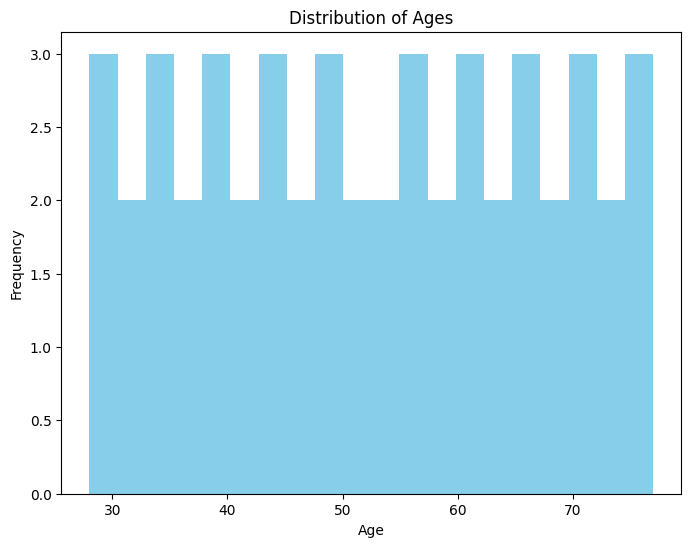

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(dataset1['Age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

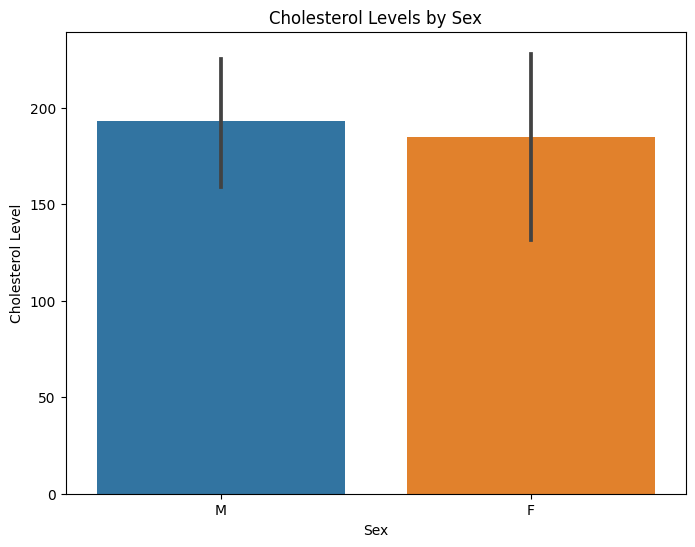

In [17]:
# Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Cholesterol', data=dataset1)
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol Levels by Sex')
plt.show()


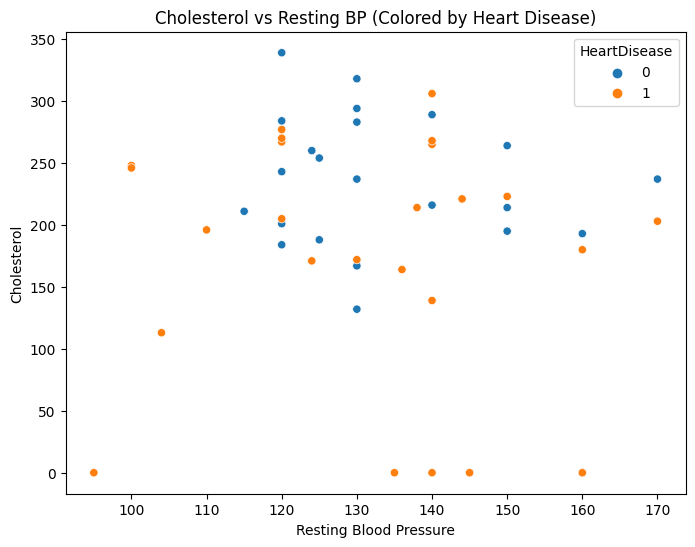

In [18]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RestingBP', y='Cholesterol', data=dataset1, hue='HeartDisease')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.title('Cholesterol vs Resting BP (Colored by Heart Disease)')
plt.show()


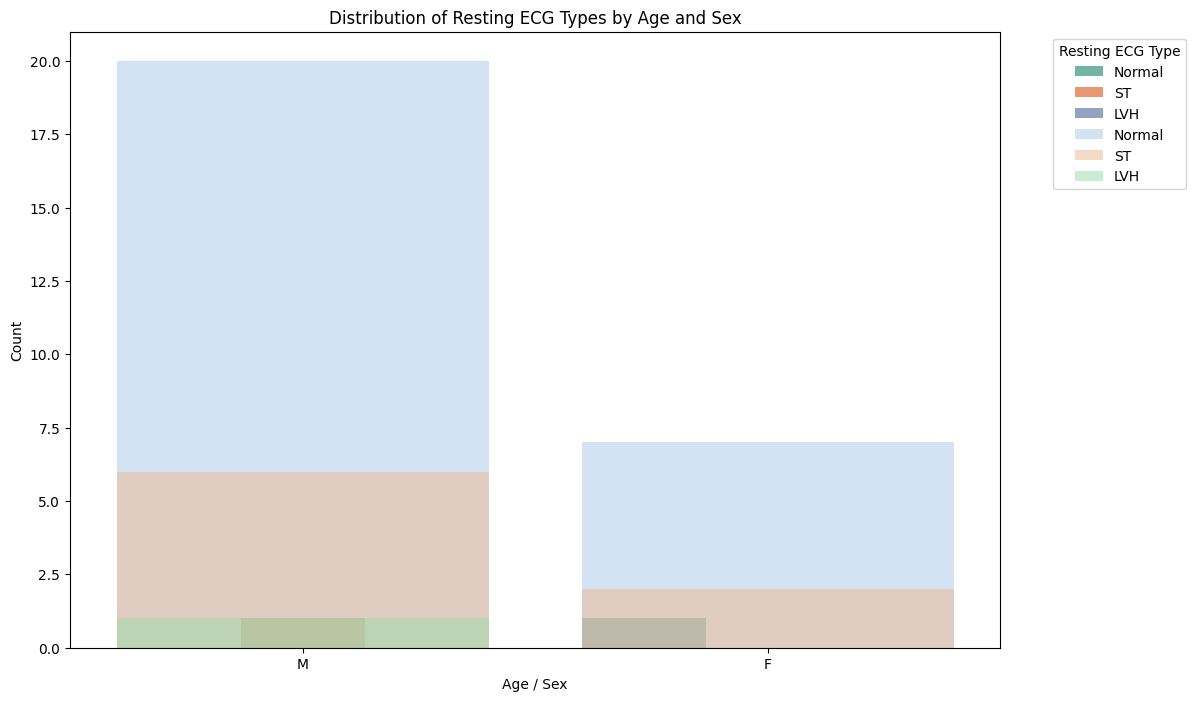

In [19]:
# Bar plot showing counts of 'RestingECG' by 'Age' and 'Sex'
plt.figure(figsize=(12, 8))
sns.countplot(x='Age', hue='RestingECG', data=merged_data, palette='Set2', dodge=True)
sns.countplot(x='Sex', hue='RestingECG', data=merged_data, palette='pastel', dodge=False, alpha=0.5)
plt.title('Distribution of Resting ECG Types by Age and Sex')
plt.xlabel('Age / Sex')
plt.ylabel('Count')
plt.legend(title='Resting ECG Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**2.3 Analysis of Cholesterol Levels Across Age Groups using ANOVA**

Analysis of Variance (ANOVA) test was conducted to explore potential disparities in mean cholesterol levels across different age groups within the merged dataset. It segmented the data into predefined age brackets—Young Adults, Middle-aged Adults, and Older Adults—to assess if these groups exhibited statistically significant differences in their average cholesterol levels. The ANOVA test computed various statistical parameters, including sum of squares (sum_sq), degrees of freedom (df), F-value (F), and p-value (PR(>F)). A low p-value (< 0.05) would have indicated substantial variations in mean cholesterol levels among the age groups, providing valuable insights into cholesterol discrepancies across distinct age ranges.


In [20]:
# Categorize ages into groups
merged_data['AgeGroup'] = pd.cut(merged_data['Age'], bins=[18, 35, 50, 70], labels=['Young Adults', 'Middle-aged Adults', 'Older Adults'])

In [21]:
# Perform ANOVA to compare cholesterol levels among age groups
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Cholesterol ~ AgeGroup', data=merged_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq    df         F    PR(>F)
AgeGroup   26606.485714   2.0  1.546744  0.227984
Residual  283826.514286  33.0       NaN       NaN


# **3 Comparative Analysis of Cholesterol with Heart Health Metrics.**
**3.1 Visualizing Cholesterol Associations with Heart Health Metrics**

We then delved into the intricate relationships between cholesterol levels and crucial heart health metrics such as blood pressure (systolic and diastolic), Body Mass Index (BMI), and heart rate. Through a series of scatter plots, we aim to visualize potential connections or patterns that might exist between cholesterol and these fundamental health indicators. Additionally, to quantify the degree of association, a correlation matrix is constructed, providing a comprehensive overview of the interdependencies among these vital factors influencing heart health.

In [22]:
# Scatter plots for visualizing relationships
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Cholesterol vs. Diastolic Blood Pressure')

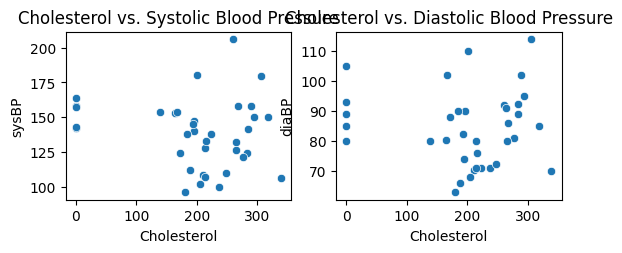

In [23]:

# Cholesterol vs. Blood Pressure
plt.subplot(2, 2, 1)
sns.scatterplot(x='Cholesterol', y='sysBP', data=merged_data)
plt.title('Cholesterol vs. Systolic Blood Pressure')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Cholesterol', y='diaBP', data=merged_data)
plt.title('Cholesterol vs. Diastolic Blood Pressure')


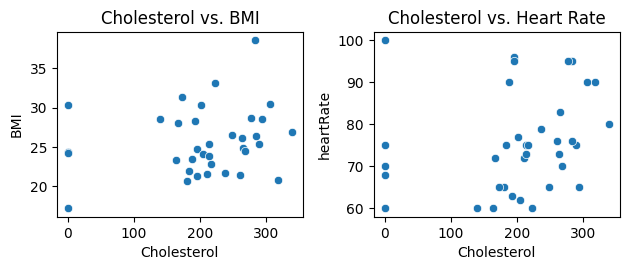

In [24]:
# Cholesterol vs. BMI and Heart Rate
plt.subplot(2, 2, 3)
sns.scatterplot(x='Cholesterol', y='BMI', data=merged_data)
plt.title('Cholesterol vs. BMI')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Cholesterol', y='heartRate', data=merged_data)
plt.title('Cholesterol vs. Heart Rate')

plt.tight_layout()
plt.show()

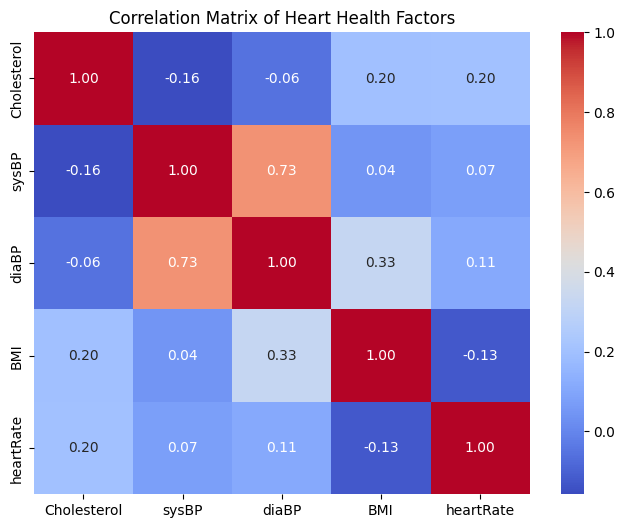

In [25]:
# Correlation matrix
correlation_matrix = merged_data[['Cholesterol', 'sysBP', 'diaBP', 'BMI', 'heartRate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Health Factors')
plt.show()

**3.2 Analyzing Cholesterol Variation with Age using Linear Regression**
Employed linear regression through the statsmodels library to explore how age influences cholesterol levels within the dataset. By defining age as the independent variable and cholesterol as the dependent variable, the linear regression model assesses the impact of age on cholesterol variation. The addition of a constant to the independent variable accounts for the intercept term in the regression analysis. The resultant model provides insights into the strength, direction, and significance of the relationship between age and cholesterol levels, facilitating a deeper understanding of this association.

In [26]:
import statsmodels.api as sm

# Define independent variable (Age) and dependent variable (Cholesterol)
X = merged_data['Age']
y = merged_data['Cholesterol']

In [27]:
# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)


In [28]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [29]:
# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     13.05
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           0.000969
Time:                        00:15:48   Log-Likelihood:                -208.35
No. Observations:                  36   AIC:                             420.7
Df Residuals:                      34   BIC:                             423.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.5235     69.080      6.435      0.0

The final regression analysis reveals a statistically significant but relatively weak relationship between age and cholesterol levels. While age shows a significant impact on cholesterol, it explains only a small portion of the variation in cholesterol levels. This suggests that factors beyond age play a more substantial role in determining cholesterol levels. Further analysis or inclusion of additional variables might be necessary to create a more comprehensive model for predicting cholesterol levels accurately.

We then explored the impact of different variables on cholesterol levels using regression analysis. We considered factors like age, sex, blood pressure (sysBP and diaBP), BMI, heart rate, and glucose levels to predict cholesterol. Conducted a multiple linear regression analysise which helped determine which of these variables have a significant impact on cholesterol levels and to what extent.

**3.3 Exploring Cholesterol Levels and Age Relationship through Regression Analysis**

I utilized Ordinary Least Squares (OLS) Regression to investigate the potential relationship between age and cholesterol levels in the dataset. The OLS regression model provides insights into how changes in age may influence variations in cholesterol levels. The resulting regression summary showcases key statistical indicators such as R-squared, coefficients, and p-values, aiding in determining the significance and direction of the relationship between age and cholesterol levels.

In [30]:
# Fill missing values in 'Cholesterol' column with mean
merged_data['Cholesterol'].fillna(merged_data['Cholesterol'].mean(), inplace=True)

In [31]:
import numpy as np
# Replace infinite values in 'Cholesterol' column with NaN
merged_data['Cholesterol'] = merged_data['Cholesterol'].replace([np.inf, -np.inf], np.nan)

In [32]:
# Drop rows with NaN values in 'Cholesterol' column
merged_data.dropna(subset=['Cholesterol'], inplace=True)

In [33]:
# Defining dependent and independent variables
y = merged_data['Cholesterol']  # Cholesterol as dependent variable
X = merged_data[['Age']]  # Age as independent variable

In [34]:
# Add constant to the independent variable matrix
X = sm.add_constant(X)


In [35]:
# Fit the regression model
model = sm.OLS(y, X).fit()

In [36]:
# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     13.05
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           0.000969
Time:                        00:16:12   Log-Likelihood:                -208.35
No. Observations:                  36   AIC:                             420.7
Df Residuals:                      34   BIC:                             423.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.5235     69.080      6.435      0.0

**# Conclusion**

It can be concluded that we :

•Conducted exploratory analysis on heart disease risk factors, merging datasets for comprehensive insights.

•Visualized distributions and relationships among key factors, identified potential correlations between cholesterol and heart health metrics.

•Employed ANOVA to assess cholesterol differences across age groups.
Explored age's impact on cholesterol levels using regression, revealing a statistically significant but weak relationship.

•Discovered the need for additional variables in accurately predicting cholesterol and emphasized the complexity of heart health factors, prompting a call for a more comprehensive predictive model.
